# The Langchain Hierarchy

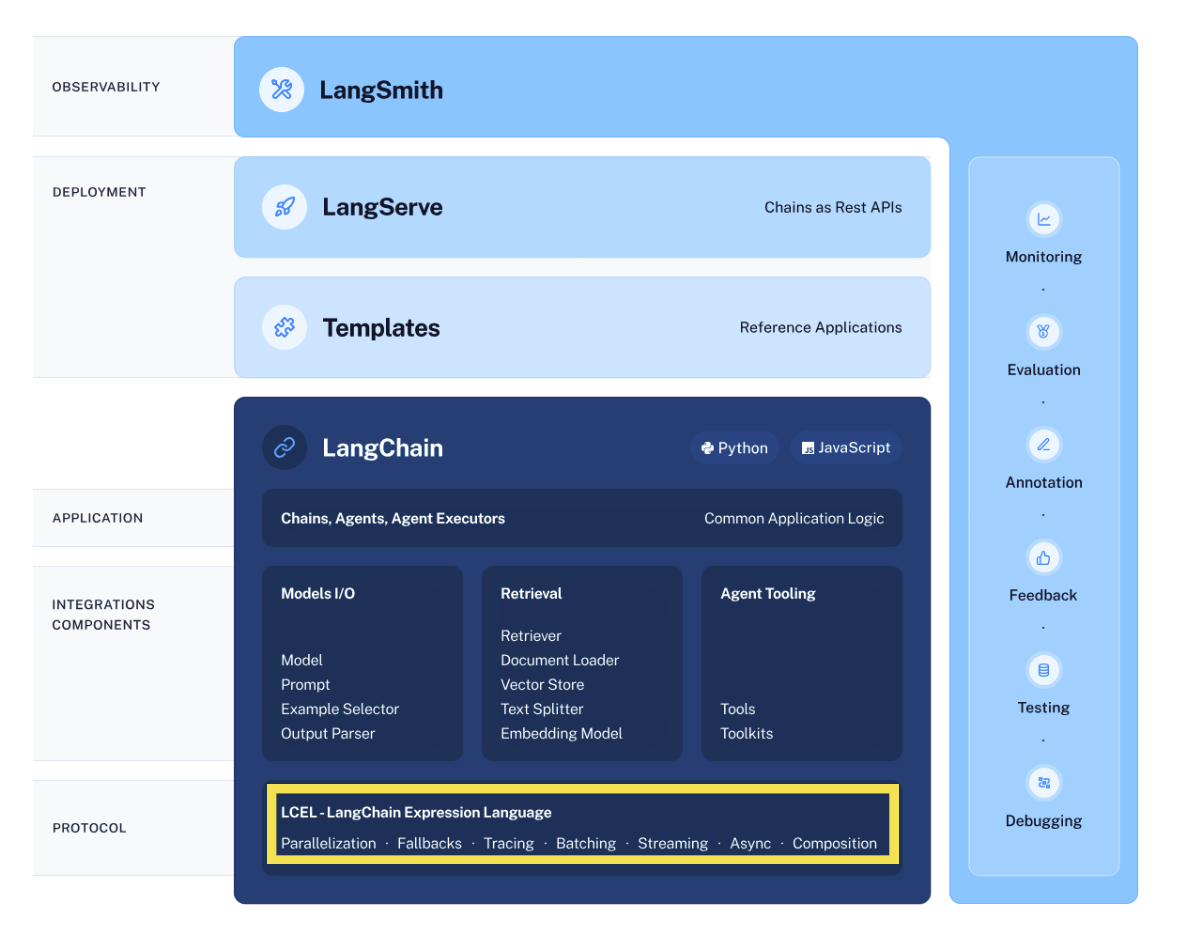

# Create the Index

In [1]:
import os
from git import Repo
from langchain.vectorstores import FAISS
from langchain.document_loaders import GitLoader
from langchain.embeddings import FastEmbedEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter

### download and load data

In [2]:
repo = Repo.clone_from("https://github.com/langchain-ai/langserve", "./langserve_repo")
branch = repo.head.reference
branch

<git.Head "refs/heads/main">

In [3]:
loader = GitLoader(repo_path="./langserve_repo/", branch=branch)
langserve_data = loader.load()
langserve_data

[Document(page_content='{\n  "contributors": ["eyurtsev", "hwchase17", "nfcampos", "efriis", "jacoblee93", "dqbd", "kreneskyp", "adarsh-jha-dev", "harris", "baskaryan", "hinthornw", "bracesproul", "jakerachleff", "craigsdennis", "anhi", "169", "LarchLiu", "PaulLockett", "RCMatthias", "jwynia", "majiayu000", "mpskex", "shivachittamuru", "sinashaloudegi", "sowsan", "akira"],\n  "message": "Thank you for your pull request and welcome to our community. We require contributors to sign our Contributor License Agreement, and we don\'t seem to have the username {{usersWithoutCLA}} on file. In order for us to review and merge your code, please complete the Individual Contributor License Agreement here https://forms.gle/Ljhqvt9Gdi1N385W6 .\\n\\nThis process is done manually on our side, so after signing the form one of the maintainers will add you to the contributors list.\\n\\nFor more details about why we have a CLA and other contribution guidelines please see: https://github.com/langchain-ai/

In [4]:
splitter = RecursiveCharacterTextSplitter(
                                        chunk_size=512,
                                        chunk_overlap=100,
                                        )

langserve_data = splitter.split_documents(langserve_data)
len(langserve_data)

3842

### configure embedding llm

In [5]:
embedding_llm = FastEmbedEmbeddings(model_name="BAAI/bge-small-en-v1.5")

### storing

In [6]:
faiss_path = "./langserve_faiss"
if not os.path.exists(faiss_path):
    os.makedirs(faiss_path)
    vectorstore = FAISS.from_documents(
                                        langserve_data,
                                        embedding_llm
                                        )
    vectorstore.save_local(faiss_path)
else:
    print('FAISS DB already exists')

vectorstore